<h1><center><font size="6">Credit Card Fraud Detection Predictive Models</font></center></h1>
<h2><center><font size="5">Dealing with Imbalanced Data</font></center></h2>


<center><img src="https://images.unsplash.com/photo-1563013544-824ae1b704d3?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80" width="600"></img></center>


# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Import Dependencies</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>  
    - <a href='#41'>Glimpse the data</a>  
    - <a href='#410'>Profile Report</a>
    - <a href='#42'>Check missing data</a>
    - <a href='#420'>Check Duplicates</a>
    - <a href='#43'>Check data unbalance</a>
- <a href='#5'>Data exploration</a>
- <a href='#221'>Under-Sampling</a>
- <a href='#6'>Predictive models</a>  
    - <a href='#61'>RandomForrestClassifier</a> 
    - <a href='#62'>AdaBoostClassifier</a>
    - <a href='#64'>XGBoost</a>
    - <a href='#65'>Lazy Predict</a>
- <a href='#7'>Conclusions</a>
- <a href='#8'>References</a>


# <a id="1">Introduction</a>  

The datasets contains transactions made by credit cards in **September 2013** by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.172%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**.   

Due to confidentiality issues, there are not provided the original features and more background information about the data.  

* Features **V1**, **V2**, ... **V28** are the **principal components** obtained with **PCA**;  
* The only features which have not been transformed with PCA are **Time** and **Amount**. Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
* Feature **Class** is the response variable and it takes value **1** in case of fraud and **0** otherwise.  



# <a id="2">Import Dependencies</a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import profile_report

%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

print('Setup Completed')

Setup Completed


# <a id='3'>Read the data</a> 

In [47]:
data_df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# <a id='4'>Check the data</a> 

In [48]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [49]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## <a id="41">Glimpse the data</a>

In [50]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


## <a id="410">Profile Report</a>

function generates a comprehensive report that includes various statistics, insights, and visualizations about the DataFrame. This report can be helpful in understanding the data, identifying missing values, exploring data distributions, detecting correlations, and more.

In [51]:
# data_df.profile_report()

## <a id="42">Check missing data</a>  

Let's check if there is any missing data.

In [52]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


there is no missing data

## <a id="420">Check Duplicates</a>  

Let's check if there are any Duplicates in our data

In [53]:
duplicated_values = data_df[data_df.duplicated()]
print(duplicated_values)

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [54]:
data_df.drop_duplicates(inplace=True)

all done we droped the dupliccates

## <a id='43'>Check Unbalanced Data</a>

In [55]:
data_df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

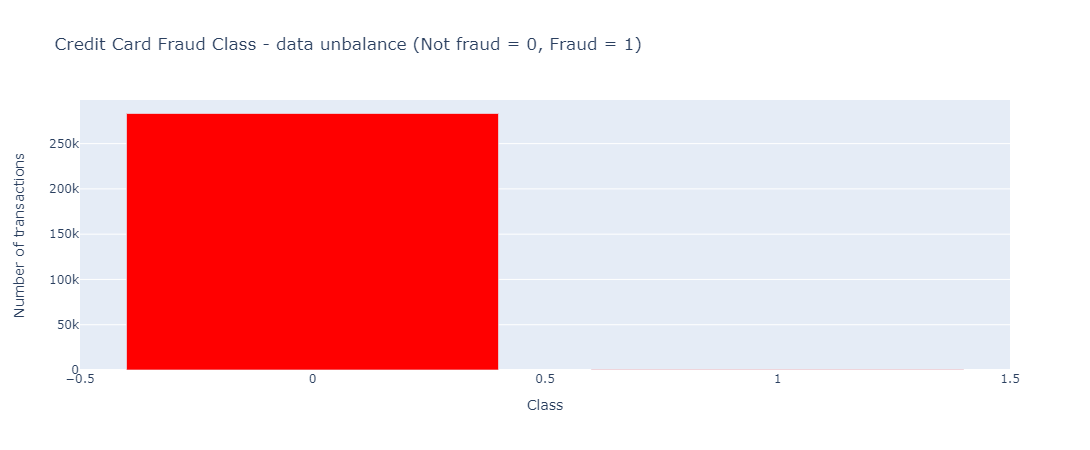

In [56]:
temp = data_df["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.

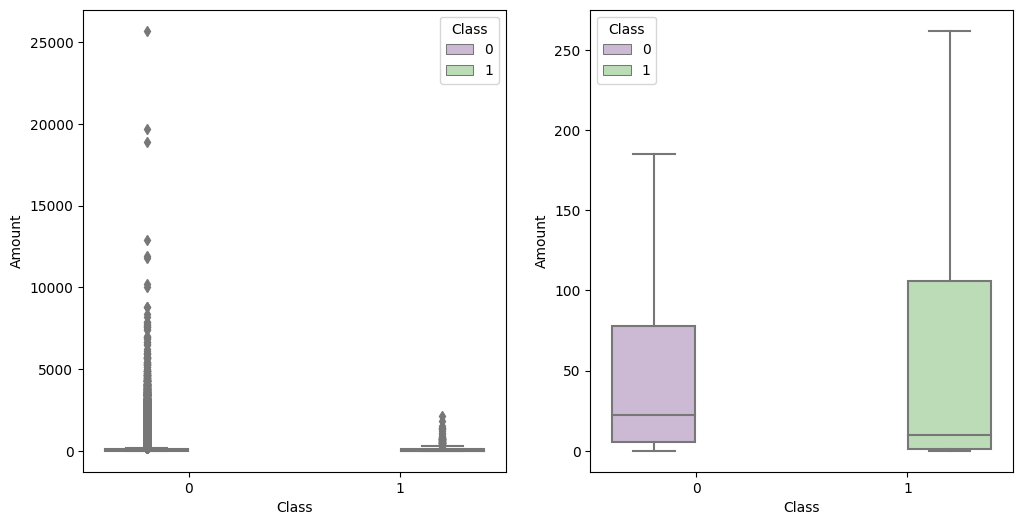

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data_df, palette="PRGn",showfliers=False)
plt.show();

In [58]:
tmp = data_df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [59]:
class_1.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

# <a id='221'>Under-Sampling</a>

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [60]:
# Separete Data for Data Analysis
legit = data_df[data_df.Class == 0]
fraudulent = data_df[data_df.Class == 1]

In [61]:
# Check Shape of our Labels
print(legit.shape)
print(fraudulent.shape)

(283253, 31)
(473, 31)


In [62]:
# Statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [63]:
fraudulent.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [64]:
# Compare Both Transaction
data_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [65]:
legit_sample = legit.sample(n=492)

In [66]:
# Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraudulent], axis=0)

In [67]:
# Get Equal Features in Our two labels is our Goal in Under-Sampling Technique
new_df['Class'].value_counts()

Class
0    492
1    473
Name: count, dtype: int64

# <a id ='6'>Base line Modeling</a>

First we split our Data into two Classes

In [68]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

Split your dataset into a training set and a test set:

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

### <a id ='61'>RandomForest Classifier</a>

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [70]:
# Define your parameter values
RFC_METRIC = 'gini'  # or 'entropy' based on your choice
NUM_ESTIMATORS = 100  # or any desired number
NUM_JOBS = 4  # or any desired number
RANDOM_STATE = 42  # or any desired value

# Create the RandomForestClassifier with the defined parameter values
clf_rfc = RandomForestClassifier(
    n_jobs=NUM_JOBS,
    random_state=RANDOM_STATE,
    criterion=RFC_METRIC,
    n_estimators=NUM_ESTIMATORS,
    verbose=False
)

In [71]:
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=4, random_state=42, verbose=False)

In [72]:
y_pred = clf_rfc.predict(X_test)

### Feature Importance

we can classify if feature will be important to our model or no:

In [73]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

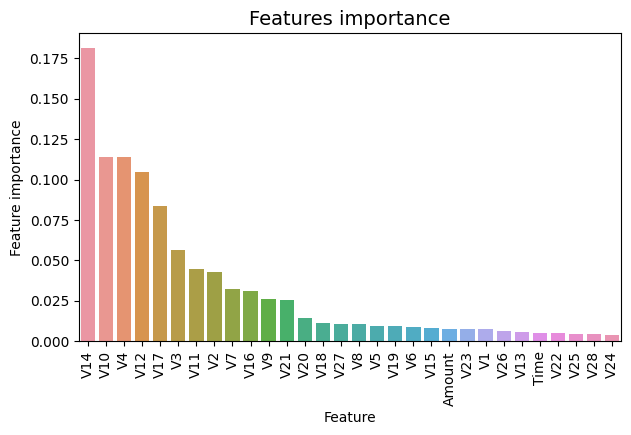

In [74]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf_rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

### Model Evaluation

Evaluate the model's performance using appropriate metrics:

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.92
Confusion Matrix:
 [[93  5]
 [10 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        98
           1       0.94      0.89      0.92        95

    accuracy                           0.92       193
   macro avg       0.92      0.92      0.92       193
weighted avg       0.92      0.92      0.92       193



### Hyperparameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # Add other hyperparameters to tune
}

grid_search = GridSearchCV(estimator=clf_rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

## <a id='64'>XGBoost Classifier</a>

In [77]:
clf_XGB = xgb.XGBClassifier(
    learning_rate=0.1,  # Adjust as needed
    n_estimators=100,   # Adjust as needed
    max_depth=3,        # Adjust as needed
    random_state=42     # Set a random state for reproducibility
)

clf_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [78]:
y_pred = clf_XGB.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.93
Confusion Matrix:
 [[93  5]
 [ 9 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        98
           1       0.95      0.91      0.92        95

    accuracy                           0.93       193
   macro avg       0.93      0.93      0.93       193
weighted avg       0.93      0.93      0.93       193



In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # Add other hyperparameters to tune
}

grid_search = GridSearchCV(estimator=clf_XGB, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

## <a id='62'>AdaBoostClassifier </a>

In [81]:
# Create and train the AdaBoost classifier
clf_ada = AdaBoostClassifier(
    n_estimators=50,         # Adjust as needed
    learning_rate=1.0,       # Adjust as needed
    random_state=42           # Set a random state for reproducibility
)
clf_ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_ada.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.94
Confusion Matrix:
 [[93  5]
 [ 7 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        98
           1       0.95      0.93      0.94        95

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193



## <a id='65'>Lazy Predict</a>

Python library that provides a quick way to build and evaluate a wide range of machine learning models with minimal code. It's designed to help you get a sense of how different models perform on your dataset without the need for extensive manual configuration. It's particularly useful for initial exploratory data analysis and model selection.

install Lazy Predict

In [84]:
!pip install lazypredict

In [85]:
from lazypredict.Supervised import LazyClassifier
# fitting data in LazyRegressor because
# here we are solving Regression use case.
clf = LazyClassifier(verbose=0,
                     ignore_warnings=False,
                     custom_metric=None)
  
# fitting data in LazyClassifier
models, predictions = clf.fit(X_train, X_test,
                              y_train, y_test)
# lets check which model did better
# on Breast Cancer Dataset
print(models)

 14%|█▍        | 4/29 [00:00<00:03,  7.72it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|████████▉ | 26/29 [00:02<00:00,  9.78it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:03<00:00,  7.71it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.94               0.94     0.94      0.94   
LogisticRegression                 0.94               0.94     0.94      0.94   
LinearSVC                          0.94               0.94     0.94      0.94   
ExtraTreesClassifier               0.94               0.94     0.94      0.94   
LGBMClassifier                     0.93               0.93     0.93      0.93   
XGBClassifier                      0.93               0.93     0.93      0.93   
SGDClassifier                      0.93               0.93     0.93      0.93   
BaggingClassifier                  0.93               0.93     0.93      0.93   
CalibratedClassifierCV             0.93               0.93     0.93      0.93   
RandomForestClassifier             0.92               0.92     0.92      0.92   
SVC                         

# Save Model

In [86]:
import joblib

joblib.dump(clf_rfc, 'best_model.pkl')  # Save the best model

['best_model.pkl']

# <a id='8'>Refrences</a>

[1] Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud

[2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis

[3] RandomForrestClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

[4] ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve

[5] AdaBoostClassifier, http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

[6] CatBoostClassifier, https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostclassifier-docpage/

[7] XGBoost Python API Reference, http://xgboost.readthedocs.io/en/latest/python/python_api.html

[8] LightGBM Python implementation, https://github.com/Microsoft/LightGBM/tree/master/python-package

[9] LightGBM algorithm, https://www.microsoft.com/en-us/research/wp-content/uploads/2017/11/lightgbm.pdf